## Анализ данных по КОВИД 19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_df = pd.read_csv("data/covid_19_data.csv")
raw_df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
raw_df.shape

(306429, 8)

In [4]:
raw_df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [5]:
#убираем ненунжные столбцы
df_1 = raw_df.drop(['SNo','Last Update'], axis=1)
df_1.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [6]:
# проверяем на дубликаты 

df_1.duplicated(['ObservationDate', 'Province/State','Country/Region','Confirmed','Deaths', 'Recovered']).sum()

1

In [7]:
# удаление дубликатов
df_1 = df_1.drop_duplicates(['ObservationDate', 'Province/State','Country/Region','Confirmed','Deaths', 'Recovered'])

# проверяем на дубликаты 
df_1.duplicated(['ObservationDate', 'Province/State','Country/Region','Confirmed','Deaths', 'Recovered']).sum()

0

In [8]:
# изучаем список стран
df_1['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'China', 'Kiribati', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia',
       'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden',
       'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria',
       'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia',
       'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark',
       'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus',
       'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic',
       'Indonesia', 'Portugal

In [9]:
# изучаем страну 'China'
df_1.loc[df_1["Country/Region"] == "China", "Province/State"].unique()


array(['Unknown'], dtype=object)

In [10]:
# Изучаем страну "Others"
df_1.loc[df_1["Country/Region"] == "Others", :]

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
965,02/07/2020,Cruise Ship,Others,61.0,0.0,0.0
1039,02/08/2020,Cruise Ship,Others,61.0,0.0,0.0
1113,02/09/2020,Diamond Princess cruise ship,Others,64.0,0.0,0.0
1181,02/10/2020,Diamond Princess cruise ship,Others,135.0,0.0,0.0
1255,02/11/2020,Diamond Princess cruise ship,Others,135.0,0.0,0.0
1328,02/12/2020,Diamond Princess cruise ship,Others,175.0,0.0,0.0
1403,02/13/2020,Diamond Princess cruise ship,Others,175.0,0.0,0.0
1479,02/14/2020,Diamond Princess cruise ship,Others,218.0,0.0,0.0
1554,02/15/2020,Diamond Princess cruise ship,Others,285.0,0.0,0.0
1628,02/16/2020,Diamond Princess cruise ship,Others,355.0,0.0,0.0


In [11]:
df_1.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

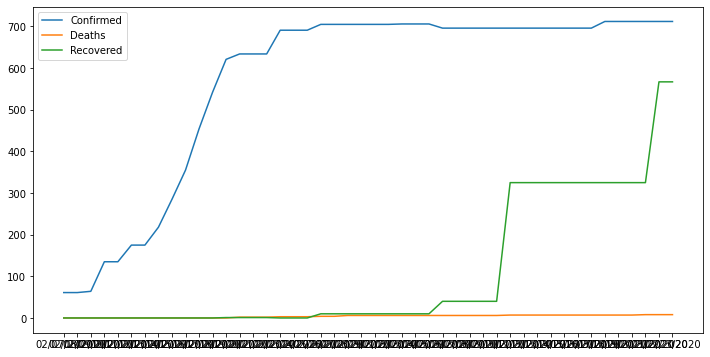

In [12]:
# Визуализация по кораблю 
ship_data = df_1.loc[df_1["Country/Region"] == "Others", :]

plt.figure(figsize=(12,6))

plt.plot(ship_data["ObservationDate"], ship_data["Confirmed"])
plt.plot(ship_data["ObservationDate"], ship_data["Deaths"])
plt.plot(ship_data["ObservationDate"], ship_data["Recovered"])

plt.legend(["Confirmed", "Deaths", "Recovered"])
plt.show()

In [13]:
df_1.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [14]:
# Изучаем даты
df_1['ObservationDate'].head()

0    01/22/2020
1    01/22/2020
2    01/22/2020
3    01/22/2020
4    01/22/2020
Name: ObservationDate, dtype: object

In [15]:
# метод для конвертации временных данных 
# date = "01/22/2020"
# date = "01.22.2020"
date = "4th of June 2020"
pd.to_datetime(date).date()

datetime.date(2020, 6, 4)

In [16]:
# конвертация аременных данных в тип Timestamp
df_2 = df_1.copy()

df_2["ObservationDate"] = pd.to_datetime(df_2["ObservationDate"])
df_2.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


In [17]:
# по - элементно извлекаем только даты
df_2["ObservationDate"] = df_2["ObservationDate"].apply(lambda date: date.date())
df_2["ObservationDate"].head()

0    2020-01-22
1    2020-01-22
2    2020-01-22
3    2020-01-22
4    2020-01-22
Name: ObservationDate, dtype: object

In [18]:
df_2["ObservationDate"][10]

datetime.date(2020, 1, 22)

In [19]:
# Анализ
# группировка данных по датам и выводим суммарное значение ( по всему миру)
w_data = df_2.groupby(["ObservationDate"]).sum()
w_data.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,653.0,17.0,32.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0


In [20]:
df_2.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [22]:
# группируем данные по странам и датам
cd_data = df_2.groupby(["Country/Region", "ObservationDate"]).sum()

cd_data.head(10)

Confirmed  Deaths  Recovered
Country/Region  ObservationDate                              
 Azerbaijan     2020-02-28             1.0     0.0        0.0
('St. Martin',) 2020-03-10             2.0     0.0        0.0
Afghanistan     2020-02-24             1.0     0.0        0.0
                2020-02-25             1.0     0.0        0.0
                2020-02-26             1.0     0.0        0.0
                2020-02-27             1.0     0.0        0.0
                2020-02-28             1.0     0.0        0.0
                2020-02-29             1.0     0.0        0.0
                2020-03-01             1.0     0.0        0.0
                2020-03-02             1.0     0.0        0.0

In [23]:
cd_data.loc["Afghanistan",:]

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-02-24,1.0,0.0,0.0
2020-02-25,1.0,0.0,0.0
2020-02-26,1.0,0.0,0.0
2020-02-27,1.0,0.0,0.0
2020-02-28,1.0,0.0,0.0
...,...,...,...
2021-05-25,66903.0,2836.0,56518.0
2021-05-26,67743.0,2855.0,56711.0
2021-05-27,68366.0,2869.0,56962.0


In [34]:
# изучаем данные данные по Афганистану  (возможно, там нет  провинций)
df_2.loc[df_2["Country/Region"] == "Afghanistan", :].head(10)

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
2324,2020-02-24,NaN,Afghanistan,1.0,0.0,0.0
2419,2020-02-25,NaN,Afghanistan,1.0,0.0,0.0
2522,2020-02-26,NaN,Afghanistan,1.0,0.0,0.0
2628,2020-02-27,NaN,Afghanistan,1.0,0.0,0.0
2738,2020-02-28,NaN,Afghanistan,1.0,0.0,0.0
2858,2020-02-29,NaN,Afghanistan,1.0,0.0,0.0
2988,2020-03-01,NaN,Afghanistan,1.0,0.0,0.0
3121,2020-03-02,NaN,Afghanistan,1.0,0.0,0.0
3271,2020-03-03,NaN,Afghanistan,2.0,0.0,0.0
3432,2020-03-04,NaN,Afghanistan,4.0,0.0,0.0


In [35]:
# данные максимумов по странам 
max_data = cd_data.groupby(["Country/Region"])[['Confirmed','Deaths','Recovered']].max()
max_data.head(10)

,Confirmed,Deaths,Recovered
Country/Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,70111.0,2899.0,57281.0
Albania,132297.0,2449.0,129215.0
Algeria,128456.0,3460.0,89419.0
Andorra,13693.0,127.0,13416.0
Angola,34180.0,757.0,27646.0
Antigua and Barbuda,1259.0,42.0,1206.0
Argentina,3732263.0,77108.0,3288467.0


In [36]:
max_data.loc["Russia",:]

Confirmed    4995613.0
Deaths        118781.0
Recovered    4616422.0
Name: Russia, dtype: float64

In [37]:
# Сортировка датафрейма по определеному столбцу
max_data.sort_values(by="Confirmed", ascending= False).head(10)

,Confirmed,Deaths,Recovered
Country/Region,,,
US,33251939.0,594306.0,6399531.0
India,27894800.0,325972.0,25454320.0
Brazil,16471600.0,461057.0,14496224.0
France,5978650.0,109518.0,390878.0
Turkey,5235978.0,47271.0,5094279.0
Russia,4995613.0,118781.0,4616422.0
UK,4496823.0,128037.0,15481.0
Italy,4213055.0,126002.0,3845087.0
Argentina,3732263.0,77108.0,3288467.0


In [38]:
# Сортировка датафрейма по определеному столбцу
max_data.sort_values(by="Deaths", ascending= False).head(10)

,Confirmed,Deaths,Recovered
Country/Region,,,
US,33251939.0,594306.0,6399531.0
Brazil,16471600.0,461057.0,14496224.0
India,27894800.0,325972.0,25454320.0
Mexico,2411503.0,223455.0,1924865.0
UK,4496823.0,128037.0,15481.0
Italy,4213055.0,126002.0,3845087.0
Russia,4995613.0,118781.0,4616422.0
France,5978650.0,109518.0,390878.0
Germany,3684672.0,88413.0,3479700.0


In [33]:
df_2.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [39]:
# группировка данных по странам, провинциям и датам 
cpd_data = df_2.groupby(['Country/Region','Province/State','ObservationDate']).sum()
cpd_data.head(10)

Confirmed  \
Country/Region Province/State               ObservationDate              
Australia      Australian Capital Territory 2020-03-13             1.0   
                                            2020-03-14             1.0   
                                            2020-03-15             1.0   
                                            2020-03-16             2.0   
                                            2020-03-17             2.0   
                                            2020-03-18             3.0   
                                            2020-03-19             4.0   
                                            2020-03-20             6.0   
                                            2020-03-21             9.0   
                                            2020-03-22            19.0   

                                                             Deaths  Recovered  
Country/Region Province/State               ObservationDate                     
Australia      Australian Capital Territory 2020-03-13          0.0        0.0  
                                            2020-03-14          0.0        0.0  
                                            2020-03-15          0.0        0.0  
                                            2020-03-16          0.0        0.0  
                                            2020-03-17          0.0        0.0  
                                            2020-03-18          0.0        0.0  
                                            2020-03-19          0.0        0.0  
                                            2020-03-20          0.0        0.0  
                                            2020-03-21          0.0        0.0  
                                            2020-03-22          0.0        0.0

In [40]:
w_data.head(10)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,653.0,17.0,32.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
2020-01-27,2927.0,82.0,65.0
2020-01-28,5578.0,131.0,108.0
2020-01-29,6165.0,133.0,127.0
2020-01-30,8235.0,171.0,145.0


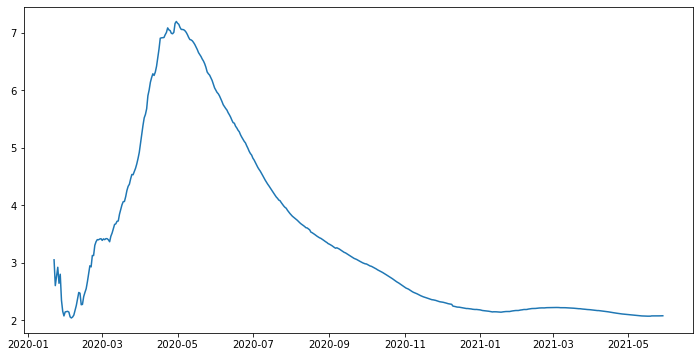

In [43]:
# оценка текущей  летальности пандемии

letal_array = (w_data["Deaths"]/ w_data["Confirmed"]) * 100
# letal_array.head(10)


plt.figure(figsize = (12,6))
plt.plot(w_data.index, letal_array)
plt.show()

In [44]:
# ежедневные случаи заболевания

def new_cases_calculate(df, col_key):
    new_cases = []
    for index in range(df.shape[0]):
        if index == 0:
            new_cases.append(df[col_key][index])
        else:
            new_cases.append(df[col_key][index] - df[col_key][index-1])
    return new_cases

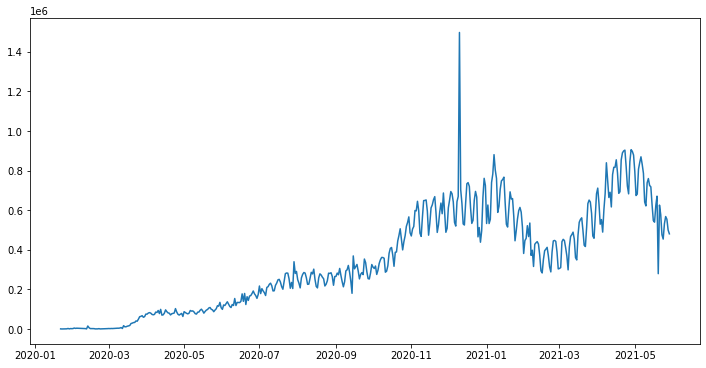

In [45]:
nc_data = new_cases_calculate(w_data, "Confirmed")

plt.figure(figsize= (12,6))
plt.plot(w_data.index,nc_data)
plt.show()

In [46]:
cpd_data.head()

Confirmed  \
Country/Region Province/State               ObservationDate              
Australia      Australian Capital Territory 2020-03-13             1.0   
                                            2020-03-14             1.0   
                                            2020-03-15             1.0   
                                            2020-03-16             2.0   
                                            2020-03-17             2.0   

                                                             Deaths  Recovered  
Country/Region Province/State               ObservationDate                     
Australia      Australian Capital Territory 2020-03-13          0.0        0.0  
                                            2020-03-14          0.0        0.0  
                                            2020-03-15          0.0        0.0  
                                            2020-03-16          0.0        0.0  
                                            2020-03-17          0.0        0.0

In [47]:
#  смотрим данные по России

ru_data = cpd_data.loc["Russia", :]
ru_data.head()

Confirmed  Deaths  Recovered
Province/State  ObservationDate                              
Adygea Republic 2020-06-01           874.0     9.0      394.0
                2020-06-02           890.0     9.0      413.0
                2020-06-03           904.0     9.0      465.0
                2020-06-04           937.0     9.0      487.0
                2020-06-05           962.0     9.0      519.0

In [49]:
# визуализация динамики пандемии по России

ru_full_data = ru_data.groupby("ObservationDate").sum()
ru_full_data.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-06-01,414328.0,4849.0,175514.0
2020-06-02,423186.0,5031.0,186602.0
2020-06-03,431715.0,5208.0,195559.0
2020-06-04,440538.0,5376.0,204197.0
2020-06-05,449256.0,5520.0,212237.0


In [51]:
# df_2.loc[df_2["Country/Region"] == "Russia", :].head()

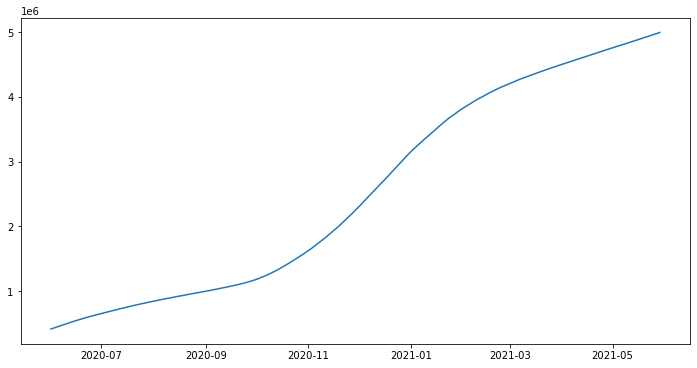

In [52]:
plt.figure(figsize= (12,6))
plt.plot(ru_full_data.index,ru_full_data["Confirmed"])
plt.show()

In [55]:
np.unique(np.array(list(map(lambda t: t[0], ru_data.index))))

array(['Adygea Republic', 'Altai Krai', 'Altai Republic', 'Amur Oblast',
       'Arkhangelsk Oblast', 'Astrakhan Oblast', 'Bashkortostan Republic',
       'Belgorod Oblast', 'Bryansk Oblast', 'Buryatia Republic',
       'Chechen Republic', 'Chelyabinsk Oblast',
       'Chukotka Autonomous Okrug', 'Chuvashia Republic',
       'Dagestan Republic', 'Ingushetia Republic', 'Irkutsk Oblast',
       'Ivanovo Oblast', 'Jewish Autonomous Okrug',
       'Kabardino-Balkarian Republic', 'Kaliningrad Oblast',
       'Kalmykia Republic', 'Kaluga Oblast', 'Kamchatka Krai',
       'Karachay-Cherkess Republic', 'Karelia Republic',
       'Kemerovo Oblast', 'Khabarovsk Krai', 'Khakassia Republic',
       'Khanty-Mansi Autonomous Okrug', 'Kirov Oblast', 'Komi Republic',
       'Kostroma Oblast', 'Krasnodar Krai', 'Krasnoyarsk Krai',
       'Kurgan Oblast', 'Kursk Oblast', 'Leningrad Oblast',
       'Lipetsk Oblast', 'Magadan Oblast', 'Mari El Republic',
       'Mordovia Republic', 'Moscow', 'Moscow Oblas

In [57]:
ru_data.loc["Sakha (Yakutiya) Republic", :].head()


,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-06-01,2042.0,8.0,903.0
2020-06-02,2116.0,8.0,943.0
2020-06-03,2214.0,9.0,1015.0
2020-06-04,2308.0,11.0,1071.0
2020-06-05,2380.0,14.0,1177.0
